In [10]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.evaluation.DunnIndex import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *


print("interClusLib Path:", interClusLib.__file__)

random_data = random_data = IntervalData.make_interval_blobs(n_samples = 30, n_dims=4 ,n_clusters = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          4.545223         5.413872         6.295771         9.051104   
1         -2.495653        -0.001693        -6.021606        -2.270829   
2          3.041732         4.183641         6.640074        10.927867   
3          5.808252         6.935207         6.685615         8.765927   
4         -1.810043         0.158412        -0.646147         2.574281   
5          8.294929        10.261334        -3.650050        -2.617982   
6         -0.917648        -0.414352        -3.000862         0.687166   
7          6.045277         8.348558         6.106546         6.206546   
8          9.361802        10.245301        -7.480339        -4.945814   
9         10.070829        10.750725        -6.923581        -3.760037   
10         8.471846         9.470715        -6.794628        -3.572

In [11]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[0 1 3 0 1 2 1 0 2 2 2 0 0 1 2 1 3 0 0 2 3 3 3 3 1 0 2 2 1 3]
0.704564597453935


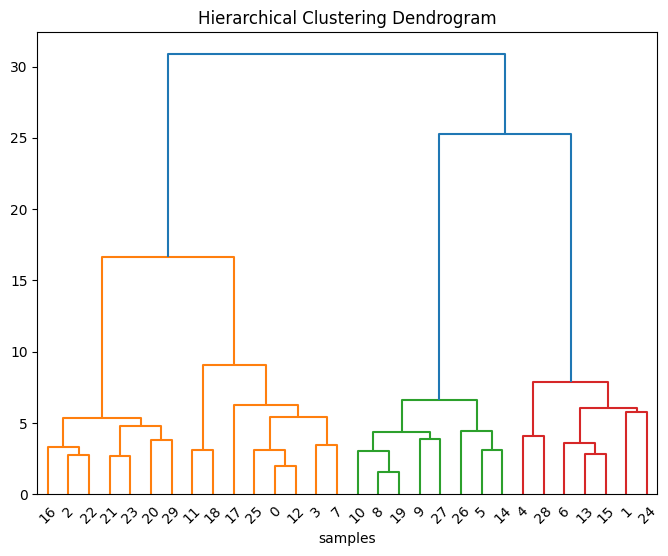

<Figure size 1000x600 with 0 Axes>

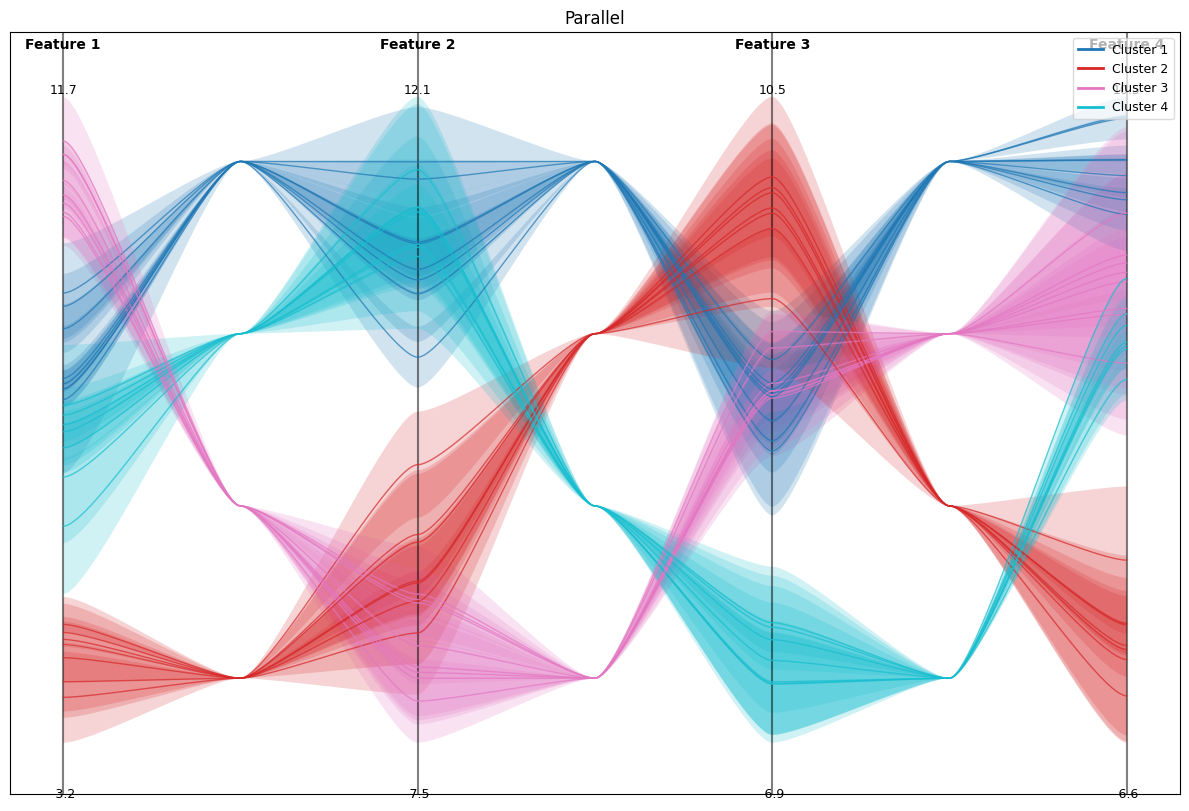

In [12]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.get_labels(), beta = 1)
plt.title("Parallel")
plt.show()

In [13]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.9519144 , 0.01299672, 0.03006529, 0.00502359],
       [0.01932132, 0.02986024, 0.01793049, 0.93288796],
       [0.01209451, 0.00369603, 0.98164326, 0.0025662 ],
       [0.88902517, 0.05001436, 0.04673458, 0.01422589],
       [0.01446199, 0.01486145, 0.01391743, 0.95675913],
       [0.0325875 , 0.94144469, 0.01469047, 0.01127735],
       [0.00916882, 0.01169002, 0.0086844 , 0.97045676],
       [0.83362888, 0.08889944, 0.05773997, 0.01973172],
       [0.0144403 , 0.97505583, 0.0057969 , 0.00470698],
       [0.04110684, 0.91782293, 0.02283778, 0.01823245],
       [0.03583307, 0.9384462 , 0.01501764, 0.01070308],
       [0.90287987, 0.03002883, 0.05486761, 0.01222369],
       [0.90874396, 0.02685602, 0.05458393, 0.00981608],
       [0.00639577, 0.00928244, 0.00590107, 0.97842072],
       [0.05366114, 0.90519426, 0.02098214, 0.02016247],
       [0.01262218, 0.01839703, 0.01185899, 0.9571218 ],
       [0.04611875, 0.01497931, 0.92993346, 0.00896848],
       [0.77947008, 0.13427809,

0.704564597453935
1.0742009040283087


<Figure size 1000x600 with 0 Axes>

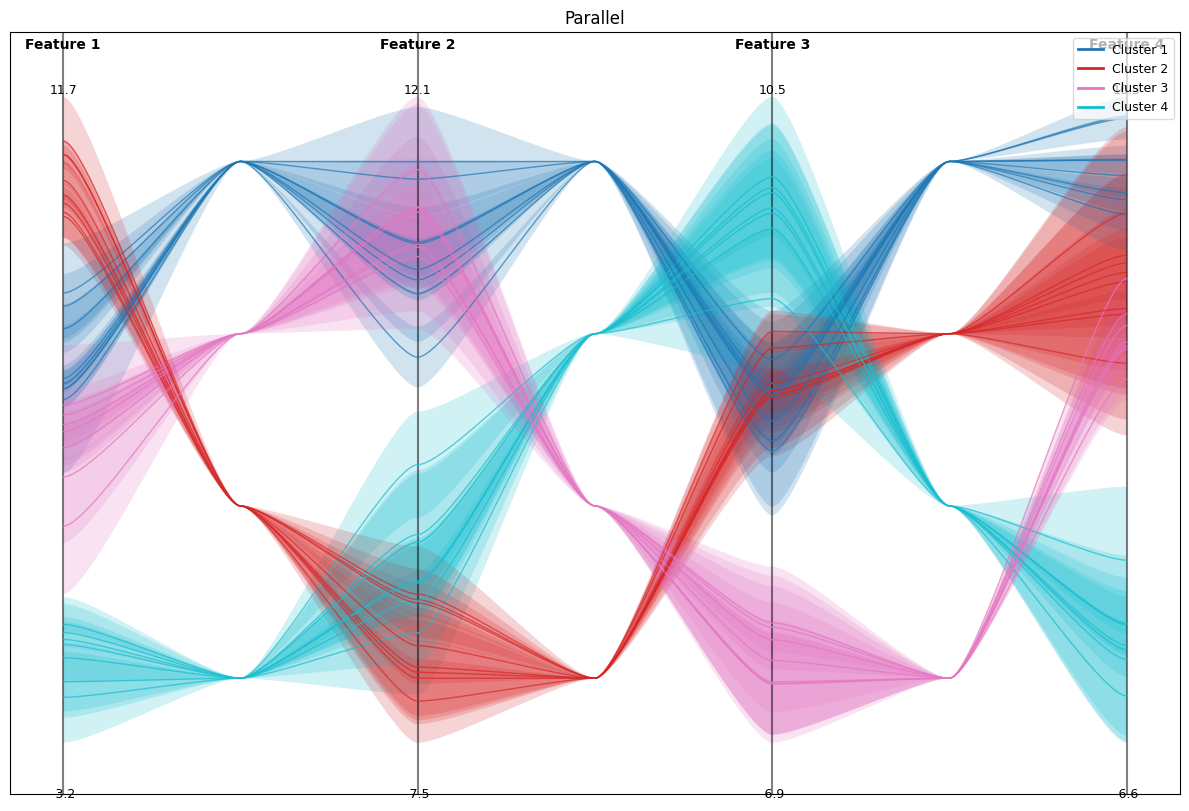

In [14]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))
print(dunn_index(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.get_crisp_assignments(), beta = 1)
plt.title("Parallel")
plt.show()

In [15]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [16]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som.topographic_error(random_data.get_intervals())


Neuron (1, 1) has these sample indices => [0, 2, 3, 7, 11, 12, 16, 17, 18, 20, 21, 22, 23, 25, 29]
Neuron (0, 0) has these sample indices => [1, 4, 6, 13, 15, 24, 28]
Neuron (1, 0) has these sample indices => [5, 8, 9, 10, 14, 19, 26, 27]


0.0

In [17]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [18]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som_2.topographic_error(random_data.get_intervals())

Neuron (1, 1) has these sample indices => [0, 2, 3, 7, 11, 12, 16, 18, 20, 21, 22, 23, 25, 29]
Neuron (0, 0) has these sample indices => [1, 5, 6, 8, 9, 10, 13, 14, 15, 19, 24, 26, 27, 28]
Neuron (0, 1) has these sample indices => [4]
Neuron (1, 0) has these sample indices => [17]


0.0